In [1]:
zip_path = '/content/drive/My\ Drive/Deep_Learning/cats-dogs.zip'
!cp {zip_path} /content/
!cd /content/
!unzip -q /content/cats-dogs.zip -d /content
!rm /content/cats-dogs.zip

replace /content/test/cat/14392.png? [y]es, [n]o, [A]ll, [N]one, [r]ename: A


In [2]:
import os
import numpy as np
import matplotlib.pyplot as plt

In [3]:
def plot_loss(history):
  plt.plot(history.history['loss'], label='loss')
  plt.plot(history.history['val_loss'], label='val_loss')
  plt.xlabel('Epoch')
  plt.ylabel('Loss')
  plt.legend()
  plt.grid(True)

# Baseline CNN Model with Added Layer

In [4]:
#Libraries
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [5]:
deeper_model = Sequential()

# Convolution layer yang lebih dalam
deeper_model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(200, 200, 3)))
deeper_model.add(MaxPooling2D((2, 2)))
deeper_model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(200, 200, 3)))
deeper_model.add(MaxPooling2D((2, 2)))
deeper_model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(200, 200, 3)))
deeper_model.add(MaxPooling2D((2, 2)))

deeper_model.add(Flatten())

deeper_model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
deeper_model.add(Dense(1, activation='sigmoid'))

opt = Adam(lr=0.001)

deeper_model.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])

deeper_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 200, 200, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 100, 100, 32)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 100, 100, 64)      18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 50, 50, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 50, 50, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 25, 25, 128)       0         
_________________________________________________________________
flatten (Flatten)            (None, 80000)             0

In [6]:
train_datagen = ImageDataGenerator(rescale=1.0/255.0, width_shift_range=0.1, height_shift_range=0.1, horizontal_flip=True)
test_datagen = ImageDataGenerator(rescale=1.0/255.0)

In [7]:
dataset_dir = '/content/'

datagen = ImageDataGenerator(rescale=1.0/255.0)

train_augmented_iterator = train_datagen.flow_from_directory(os.path.join(dataset_dir, 'train'), class_mode='binary', batch_size=128, target_size=(200, 200))
test_augmented_iterator = test_datagen.flow_from_directory(os.path.join(dataset_dir, 'test'), class_mode='binary', batch_size=128, target_size=(200, 200))

Found 12749 images belonging to 2 classes.
Found 2252 images belonging to 2 classes.


Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/75
100/100 [==============================] - 127s 1s/step - loss: 1.2324 - accuracy: 0.6046 - val_loss: 0.6099 - val_accuracy: 0.6621
Epoch 2/75
100/100 [==============================] - 128s 1s/step - loss: 0.5945 - accuracy: 0.6900 - val_loss: 0.5664 - val_accuracy: 0.6940
Epoch 3/75
100/100 [==============================] - 127s 1s/step - loss: 0.5586 - accuracy: 0.7159 - val_loss: 0.5247 - val_accuracy: 0.7313
Epoch 4/75
100/100 [==============================] - 128s 1s/step - loss: 0.5347 - accuracy: 0.7321 - val_loss: 0.5068 - val_accuracy: 0.7531
Epoch 5/75
100/100 [==============================] - 128s 1s/step - loss: 0.5125 - accuracy: 0.7430 - val_loss: 0.4881 - val_accuracy: 0.7536
Epoch 6/75
100/100 [==============================] - 127s 1s/step - loss: 0.4903 - accuracy: 0.7649 - val_loss: 0.4706 - val_accuracy: 0.7731
Epoch 7/75
100/100 [==============================] - 127s 1s/step

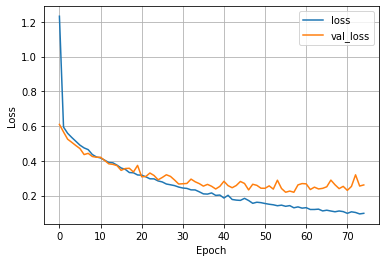

In [8]:
history_augmented_dataset = deeper_model.fit_generator(train_augmented_iterator, steps_per_epoch=len(train_augmented_iterator), validation_data=test_augmented_iterator, validation_steps=len(test_augmented_iterator), epochs=75)
plot_loss(history_augmented_dataset)

# Kesimpulan
Sweetspot berada pada epoch ke-58. Nilai validation loss rendah dan akurasi sebesar 91.74% dengan menggunakan optimizer Adam dan data images yang sudah diaugmentasi menggunakan width shift, height shift, serta horizontal flip. Kalau diperhatikan model tidak terlalu overfit karena validation loss masih belum jelas kelihatan trendnya. Jika nilai epoch dinaikkan akan semakin jelas apakah model kita overfit atau tidak.